# Climate Change Belief Analysis

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import nltk 
import string
import re
%matplotlib inline

## Import Train and Test Dataset

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


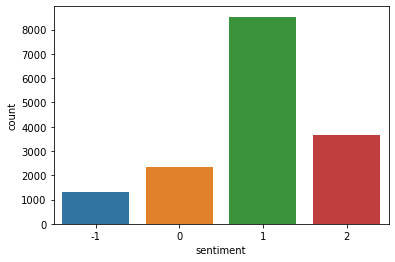

In [6]:
sns.countplot(x = 'sentiment', data = train)

## Data Cleaning and Text Preprocessing

In [9]:
def clean_message(message):
    message = re.sub(r'@[A-Za-z0-9]+','',message) ##Remove @aderate
    message = re.sub(r'#','',message) ##remove #hashtags
    message = re.sub(r'RT[\s]+', '', message) ## remove RT Retweets
    message = re.sub(r'https?:\/\/\S+', '', message) ##remove hyperlink
    message =  "".join([char for char in message if char not in string.punctuation]) ## remove puntuations i.e. ('!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~')

    return message

In [14]:
def remove_emojis(message):
    regrex_pattern = re.compile(pattern = "["
      u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
         "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',message)

In [15]:
#Clean Data and add new column called cleaned_message
train['cleaned_message'] = train['message'].apply(clean_message)
train['cleaned_message'] = train['cleaned_message'].apply(remove_emojis)

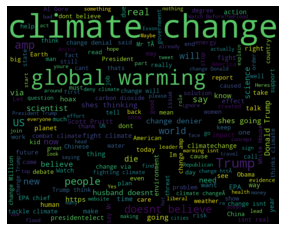

In [29]:
## plot word cloud (simply most used words)

allMessages = ' '.join([message for message in train['cleaned_message']])
wrdCloud = WordCloud(width= 1000, height=800, random_state= 42, max_font_size=120).generate(allMessages)

plt.imshow(wrdCloud, interpolation="bilinear")
plt.axis('off')
plt.show()